In [ ]:
!pip install tensorflow_addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 4.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
import numpy as np
import os
import PIL
import PIL.Image
import matplotlib.pyplot as plt
import pathlib
import random
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sb
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from keras.callbacks import EarlyStopping
from sklearn.neighbors import KNeighborsClassifier
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [ ]:
class Dict2Class(object):

    def __init__(self, my_dict):

        for key in my_dict:
            setattr(self, key, my_dict[key])

In [ ]:
ds = pd.read_csv('/content/PDFMalware2022.csv')

In [ ]:
ds.tail()

,Fine name,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,images,text,...,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Colors,Class
10021,908f8e3411d1bdf5e0fa7ca953c85cc4f133729fd4c71a...,529.0,296.0,1.0,87.0,8.0,0.0,0.0,3,No,...,0,1,0,0,0,0,0,0,0.0,Malicious
10022,72654b36f6a240d953a9ce3e898a4dfa381031ba7f5e2a...,73.0,314.0,1.0,16.0,3.0,0.0,0.0,-1,unclear,...,0,1,0,0,0,0,0,0,0.0,Malicious
10023,dad02289bc442e235961f4cf87cbde364a2250bdc57632...,4.0,377.0,2.0,13.0,11.0,0.0,0.0,0,Yes,...,0,1,0,0,0,0,0,0,0.0,Malicious
10024,b219390e223ea263476d65277d00804cfd0a93023e1903...,38.0,338.0,1.0,200006.0,13.0,0.0,0.0,0,Yes,...,0,1,0,0,0,0,0,0,0.0,Malicious
10025,b76c4910d7c637f32ebf175247d489a311c2a584a1ac6d...,2.0,180.0,1.0,11.0,0.0,0.0,1.0,0,Yes,...,23,0,0,0,0,0,0,0,0.0,Malicious


In [ ]:
sb.set(rc={'figure.figsize':(16,11)})

In [ ]:
estimators = [
    ('svc', make_pipeline(StandardScaler(), LinearSVC(max_iter = 2000))),
    ('mlp', make_pipeline(StandardScaler(), MLPClassifier(max_iter = 300))),
    ('RF', make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100))),
    ('adc', make_pipeline(StandardScaler(), AdaBoostClassifier(n_estimators=100)))
]
model = StackingClassifier(estimators = estimators, final_estimator=LogisticRegression())
modelver2 = StackingClassifier(estimators = estimators, final_estimator=LogisticRegression())

In [ ]:
ds.dropna(inplace=True)
ds['Class'].replace('Malicious', 1, inplace=True)
ds['Class'].replace('Benign', 0, inplace=True)

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10023 entries, 0 to 10025
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fine name         10023 non-null  object 
 1   pdfsize           10023 non-null  float64
 2   metadata size     10023 non-null  float64
 3   pages             10023 non-null  float64
 4   xref Length       10023 non-null  float64
 5   title characters  10023 non-null  float64
 6   isEncrypted       10023 non-null  float64
 7   embedded files    10023 non-null  float64
 8   images            10023 non-null  object 
 9   text              10023 non-null  object 
 10  header            10023 non-null  object 
 11  obj               10023 non-null  object 
 12  endobj            10023 non-null  object 
 13  stream            10023 non-null  float64
 14  endstream         10023 non-null  object 
 15  xref              10023 non-null  object 
 16  trailer           10023 non-null  float64
 17

In [ ]:
ds['EmbeddedFile'].unique()

array(['0', '8', '9', '3', '1', '2', '-1', '1(1)', '12(2)', '6', '5', '4',
       '17', '10', '11', '14', '13', '12', '15'], dtype=object)

In [ ]:
ds['embedded files'].unique()

array([ 0.,  1., -1.,  2.,  5.,  3.,  4.])

<Axes: >

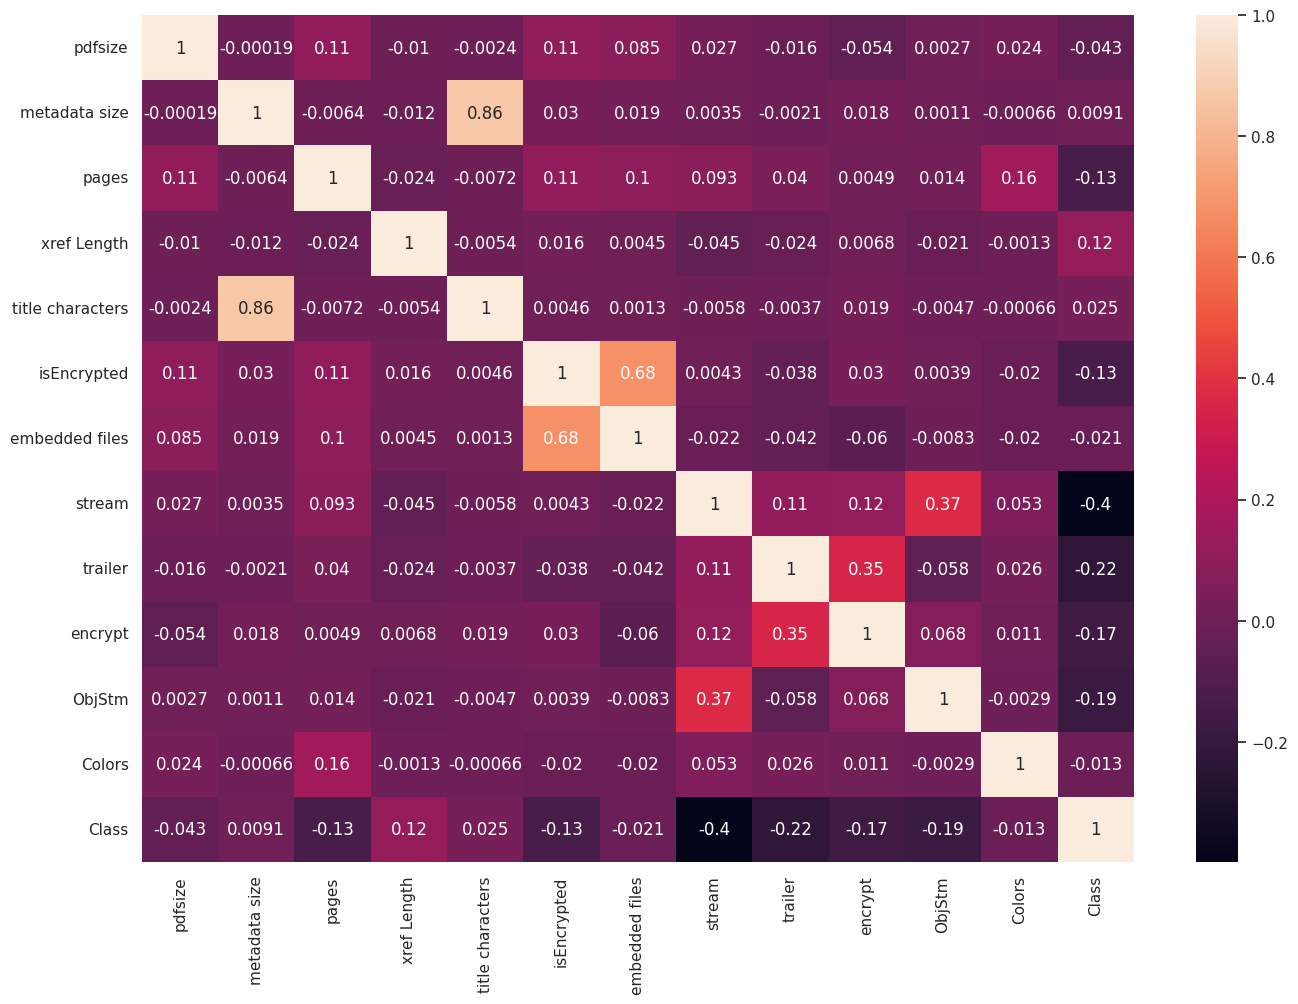

In [ ]:
numeric_ds = ds.select_dtypes(include=['number'])
sb.heatmap(numeric_ds.corr(), annot=True)

## Part 1: Removing all non-numerical values from the dataset and training on only numerical values

In [ ]:
df1 = ds.copy()
df1 = df1.select_dtypes(exclude=['object'])

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10023 entries, 0 to 10025
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pdfsize           10023 non-null  float64
 1   metadata size     10023 non-null  float64
 2   pages             10023 non-null  float64
 3   xref Length       10023 non-null  float64
 4   title characters  10023 non-null  float64
 5   isEncrypted       10023 non-null  float64
 6   embedded files    10023 non-null  float64
 7   stream            10023 non-null  float64
 8   trailer           10023 non-null  float64
 9   encrypt           10023 non-null  float64
 10  ObjStm            10023 non-null  float64
 11  Colors            10023 non-null  float64
 12  Class             10023 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 1.1 MB


In [ ]:
y_data = df1['Class']
x_data = df1.drop('Class', axis=1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.30)

In [ ]:
y_test.shape

(3007,)

In [ ]:
model.fit(x_train, y_train).score(x_test, y_test)

In [ ]:
predictions = model.predict(x_test)
print("Accuracy: ", metrics.accuracy_score(predictions, y_test))
print("Precision: ", metrics.average_precision_score(predictions, y_test))
print("F1 score: ", metrics.f1_score(predictions, y_test))

**Final accuracy is 98.8%. Both of Precision and F1 score are lower than the paper's**

## Part 2: Doing some data manipulation

In [ ]:
df2 = ds.copy()

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10023 entries, 0 to 10025
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fine name         10023 non-null  object 
 1   pdfsize           10023 non-null  float64
 2   metadata size     10023 non-null  float64
 3   pages             10023 non-null  float64
 4   xref Length       10023 non-null  float64
 5   title characters  10023 non-null  float64
 6   isEncrypted       10023 non-null  float64
 7   embedded files    10023 non-null  float64
 8   images            10023 non-null  object 
 9   text              10023 non-null  object 
 10  header            10023 non-null  object 
 11  obj               10023 non-null  object 
 12  endobj            10023 non-null  object 
 13  stream            10023 non-null  float64
 14  endstream         10023 non-null  object 
 15  xref              10023 non-null  object 
 16  trailer           10023 non-null  float64
 17

In [ ]:
df2['text'].replace('No', 0, inplace=True)
df2['text'].replace('unclear', 0, inplace=True)
df2['text'].replace('Yes', 1, inplace=True)
df2['text'].replace('0', 0, inplace=True)
df2['text'].replace('-1', 0, inplace=True)

df2['XFA'].replace('1(1)', 1, inplace=True)
df2['XFA'] = df2['XFA'].astype('int32')

df2['OpenAction'].replace('1(1)', 1, inplace=True)
df2['OpenAction'].replace('12(2)', 12, inplace=True)
df2['OpenAction'] = df2['OpenAction'].astype('int32')

df2['AA'].replace('1(1)', 1, inplace=True)
df2['AA'].replace('-1', 0, inplace=True)
df2['AA'] = df2['AA'].astype('int32')

df2['EmbeddedFile'].replace('1(1)', 1, inplace=True)
df2['EmbeddedFile'].replace('-1', 0, inplace=True)
df2['EmbeddedFile'].replace('12(2)', 12, inplace=True)
df2['EmbeddedFile'] = df2['EmbeddedFile'].astype('int32')

df2['Acroform'].replace('-1', 0, inplace=True)
df2['Acroform'].replace('1(1)', 1, inplace=True)
df2['Acroform'] = df2['Acroform'].astype('int32')

df2['launch'].replace('-1', 0, inplace=True)
df2['launch'].replace('1(1)', 1, inplace=True)
df2['launch'] = df2['launch'].astype('int32')

df2['JBIG2Decode'].replace('-1', 0, inplace=True)
df2['JBIG2Decode'].replace('1(1)', 1, inplace=True)
df2['JBIG2Decode'] = df2['JBIG2Decode'].astype('int32')

df2['RichMedia'].replace('1(1)', 1, inplace=True)
df2['RichMedia'].replace('-1', 0, inplace=True)
df2['RichMedia'].replace('2(2)', 2, inplace=True)
df2['RichMedia'] = df2['RichMedia'].astype('int32')
#Precious
df2['images'].replace('1(1)', '1', inplace=True)
df2['images'] = df2['images'].astype('int32')

df2['endobj'].replace('pdfid.py', '1099', inplace=True)
df2['endobj'] = df2['endobj'].astype('int32')

df2['JS'].replace('1(1)', '1', inplace=True)
df2['JS'].replace('29(2)', '29', inplace=True)
df2['JS'].replace('2(2)', '2', inplace=True)
df2['JS'] = df2['JS'].astype('int32')

df2 = df2.drop(df2[df2['xref'] == 'pdfid.py'].index)
df2['xref'] = df2['xref'].astype('int32')

df2 = df2.drop("encrypt", axis = 1)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10001 entries, 0 to 10025
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fine name         10001 non-null  object 
 1   pdfsize           10001 non-null  float64
 2   metadata size     10001 non-null  float64
 3   pages             10001 non-null  float64
 4   xref Length       10001 non-null  float64
 5   title characters  10001 non-null  float64
 6   isEncrypted       10001 non-null  float64
 7   embedded files    10001 non-null  float64
 8   images            10001 non-null  int32  
 9   text              10001 non-null  int64  
 10  header            10001 non-null  object 
 11  obj               10001 non-null  object 
 12  endobj            10001 non-null  int32  
 13  stream            10001 non-null  float64
 14  endstream         10001 non-null  object 
 15  xref              10001 non-null  int32  
 16  trailer           10001 non-null  float64
 17

In [ ]:
df2 = df2.select_dtypes(exclude=['object'])

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10001 entries, 0 to 10025
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pdfsize           10001 non-null  float64
 1   metadata size     10001 non-null  float64
 2   pages             10001 non-null  float64
 3   xref Length       10001 non-null  float64
 4   title characters  10001 non-null  float64
 5   isEncrypted       10001 non-null  float64
 6   embedded files    10001 non-null  float64
 7   images            10001 non-null  int32  
 8   text              10001 non-null  int64  
 9   endobj            10001 non-null  int32  
 10  stream            10001 non-null  float64
 11  xref              10001 non-null  int32  
 12  trailer           10001 non-null  float64
 13  ObjStm            10001 non-null  float64
 14  JS                10001 non-null  int32  
 15  AA                10001 non-null  int32  
 16  OpenAction        10001 non-null  int32  
 17

In [ ]:
y_data2 = df2['Class']
x_data2 = df2.drop('Class', axis=1)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_data2, y_data2, test_size=0.30)

## This is expirments

In [ ]:
model.fit(x_train2, y_train2)
predictions123 = model.predict(x_test2)
print('The dropped column is none')
print("Accuracy: ", metrics.accuracy_score(predictions123, y_test2) * 100)
print("Precision: ", metrics.average_precision_score(predictions123, y_test2) * 100)
print("F1 score: ", metrics.f1_score(predictions123, y_test2) * 100)
print("\n")
none_accuracy =  metrics.accuracy_score(predictions123, y_test2) * 100

In [ ]:
data = x_train2.drop('pdfsize', axis=1)
testdata = x_test2.drop('pdfsize', axis=1)
model.fit(data, y_train2)
predictions = model.predict(testdata)
print("Accuracy: ", metrics.accuracy_score(predictions, y_test2) * 100)
print("Precision: ", metrics.average_precision_score(predictions, y_test2) * 100)
print("F1 score: ", metrics.f1_score(predictions, y_test2) * 100)
increasePercent = (metrics.accuracy_score(predictions, y_test2) * 100 / none_accuracy * 100) - 100
print("Increase Percent: ", increasePercent)

In [ ]:
data = x_train2.drop('metadata size', axis=1)
testdata = x_test2.drop('metadata size', axis=1)
model.fit(data, y_train2)
predictions = model.predict(testdata)
print("Accuracy: ", metrics.accuracy_score(predictions, y_test2) * 100)
print("Precision: ", metrics.average_precision_score(predictions, y_test2) * 100)
print("F1 score: ", metrics.f1_score(predictions, y_test2) * 100)
increasePercent = (metrics.accuracy_score(predictions, y_test2) * 100 / none_accuracy * 100) - 100
print("Increase Percent: ", increasePercent)

In [ ]:
data = x_train2.drop('pages', axis=1)
testdata = x_test2.drop('pages', axis=1)
model.fit(data, y_train2)
predictions = model.predict(testdata)
print("Accuracy: ", metrics.accuracy_score(predictions, y_test2) * 100)
print("Precision: ", metrics.average_precision_score(predictions, y_test2) * 100)
print("F1 score: ", metrics.f1_score(predictions, y_test2) * 100)
increasePercent = (metrics.accuracy_score(predictions, y_test2) * 100 / none_accuracy * 100) - 100
print("Increase Percent: ", increasePercent)

In [ ]:
data = x_train2.drop('xref Length', axis=1)
testdata = x_test2.drop('xref Length', axis=1)
model.fit(data, y_train2)
predictions = model.predict(testdata)
print("Accuracy: ", metrics.accuracy_score(predictions, y_test2) * 100)
print("Precision: ", metrics.average_precision_score(predictions, y_test2) * 100)
print("F1 score: ", metrics.f1_score(predictions, y_test2) * 100)
increasePercent = (metrics.accuracy_score(predictions, y_test2) * 100 / none_accuracy * 100) - 100
print("Increase Percent: ", increasePercent)

In [ ]:
data = x_train2.drop('title characters', axis=1)
testdata = x_test2.drop('title characters', axis=1)
model.fit(data, y_train2)
predictions = model.predict(testdata)
print("Accuracy: ", metrics.accuracy_score(predictions, y_test2) * 100)
print("Precision: ", metrics.average_precision_score(predictions, y_test2) * 100)
print("F1 score: ", metrics.f1_score(predictions, y_test2) * 100)
increasePercent = (metrics.accuracy_score(predictions, y_test2) * 100 / none_accuracy * 100) - 100
print("Increase Percent: ", increasePercent)

In [ ]:
data = x_train2.drop('isEncrypted', axis=1)
testdata = x_test2.drop('isEncrypted', axis=1)
model.fit(data, y_train2)
predictions = model.predict(testdata)
print("Accuracy: ", metrics.accuracy_score(predictions, y_test2) * 100)
print("Precision: ", metrics.average_precision_score(predictions, y_test2) * 100)
print("F1 score: ", metrics.f1_score(predictions, y_test2) * 100)
increasePercent = (metrics.accuracy_score(predictions, y_test2) * 100 / none_accuracy * 100) - 100
print("Increase Percent: ", increasePercent)

In [ ]:
data = x_train2.drop('embedded files', axis=1)
testdata = x_test2.drop('embedded files', axis=1)
model.fit(data, y_train2)
predictions = model.predict(testdata)
print("Accuracy: ", metrics.accuracy_score(predictions, y_test2) * 100)
print("Precision: ", metrics.average_precision_score(predictions, y_test2) * 100)
print("F1 score: ", metrics.f1_score(predictions, y_test2) * 100)
increasePercent = (metrics.accuracy_score(predictions, y_test2) * 100 / none_accuracy * 100) - 100
print("Increase Percent: ", increasePercent)

In [ ]:
data = x_train2.drop('images', axis=1)
testdata = x_test2.drop('images', axis=1)
model.fit(data, y_train2)
predictions = model.predict(testdata)
print("Accuracy: ", metrics.accuracy_score(predictions, y_test2) * 100)
print("Precision: ", metrics.average_precision_score(predictions, y_test2) * 100)
print("F1 score: ", metrics.f1_score(predictions, y_test2) * 100)
increasePercent = (metrics.accuracy_score(predictions, y_test2) * 100 / none_accuracy * 100) - 100
print("Increase Percent: ", increasePercent)

In [ ]:
data = x_train2.drop('text', axis=1)
testdata = x_test2.drop('text', axis=1)
model.fit(data, y_train2)
predictions = model.predict(testdata)
print("Accuracy: ", metrics.accuracy_score(predictions, y_test2) * 100)
print("Precision: ", metrics.average_precision_score(predictions, y_test2) * 100)
print("F1 score: ", metrics.f1_score(predictions, y_test2) * 100)
increasePercent = (metrics.accuracy_score(predictions, y_test2) * 100 / none_accuracy * 100) - 100
print("Increase Percent: ", increasePercent)

In [ ]:
data = x_train2.drop('endobj', axis=1)
testdata = x_test2.drop('endobj', axis=1)
model.fit(data, y_train2)
predictions = model.predict(testdata)
print("Accuracy: ", metrics.accuracy_score(predictions, y_test2) * 100)
print("Precision: ", metrics.average_precision_score(predictions, y_test2) * 100)
print("F1 score: ", metrics.f1_score(predictions, y_test2) * 100)
increasePercent = (metrics.accuracy_score(predictions, y_test2) * 100 / none_accuracy * 100) - 100
print("Increase Percent: ", increasePercent)

In [ ]:
data = x_train2.drop('stream', axis=1)
testdata = x_test2.drop('stream', axis=1)
model.fit(data, y_train2)
predictions = model.predict(testdata)
print("Accuracy: ", metrics.accuracy_score(predictions, y_test2) * 100)
print("Precision: ", metrics.average_precision_score(predictions, y_test2) * 100)
print("F1 score: ", metrics.f1_score(predictions, y_test2) * 100)
increasePercent = (metrics.accuracy_score(predictions, y_test2) * 100 / none_accuracy * 100) - 100
print("Increase Percent: ", increasePercent)

In [ ]:
data = x_train2.drop('trailer', axis=1)
testdata = x_test2.drop('trailer', axis=1)
model.fit(data, y_train2)
predictions = model.predict(testdata)
print("Accuracy: ", metrics.accuracy_score(predictions, y_test2) * 100)
print("Precision: ", metrics.average_precision_score(predictions, y_test2) * 100)
print("F1 score: ", metrics.f1_score(predictions, y_test2) * 100)
increasePercent = (metrics.accuracy_score(predictions, y_test2) * 100 / none_accuracy * 100) - 100
print("Increase Percent: ", increasePercent)

In [ ]:
data = x_train2.drop('ObjStm', axis=1)
testdata = x_test2.drop('ObjStm', axis=1)
model.fit(data, y_train2)
predictions = model.predict(testdata)
print("Accuracy: ", metrics.accuracy_score(predictions, y_test2) * 100)
print("Precision: ", metrics.average_precision_score(predictions, y_test2) * 100)
print("F1 score: ", metrics.f1_score(predictions, y_test2) * 100)
increasePercent = (metrics.accuracy_score(predictions, y_test2) * 100 / none_accuracy * 100) - 100
print("Increase Percent: ", increasePercent)

In [ ]:
data = x_train2.drop('JS', axis=1)
testdata = x_test2.drop('JS', axis=1)
model.fit(data, y_train2)
predictions = model.predict(testdata)
print("Accuracy: ", metrics.accuracy_score(predictions, y_test2) * 100)
print("Precision: ", metrics.average_precision_score(predictions, y_test2) * 100)
print("F1 score: ", metrics.f1_score(predictions, y_test2) * 100)
increasePercent = (metrics.accuracy_score(predictions, y_test2) * 100 / none_accuracy * 100) - 100
print("Increase Percent: ", increasePercent)

In [ ]:
data = x_train2.drop('AA', axis=1)
testdata = x_test2.drop('AA', axis=1)
model.fit(data, y_train2)
predictions = model.predict(testdata)
print("Accuracy: ", metrics.accuracy_score(predictions, y_test2) * 100)
print("Precision: ", metrics.average_precision_score(predictions, y_test2) * 100)
print("F1 score: ", metrics.f1_score(predictions, y_test2) * 100)
increasePercent = (metrics.accuracy_score(predictions, y_test2) * 100 / none_accuracy * 100) - 100
print("Increase Percent: ", increasePercent)

In [ ]:
data = x_train2.drop('OpenAction', axis=1)
testdata = x_test2.drop('OpenAction', axis=1)
model.fit(data, y_train2)
predictions = model.predict(testdata)
print("Accuracy: ", metrics.accuracy_score(predictions, y_test2) * 100)
print("Precision: ", metrics.average_precision_score(predictions, y_test2) * 100)
print("F1 score: ", metrics.f1_score(predictions, y_test2) * 100)
increasePercent = (metrics.accuracy_score(predictions, y_test2) * 100 / none_accuracy * 100) - 100
print("Increase Percent: ", increasePercent)

In [ ]:
data = x_train2.drop('Acroform', axis=1)
testdata = x_test2.drop('Acroform', axis=1)
model.fit(data, y_train2)
predictions = model.predict(testdata)
print("Accuracy: ", metrics.accuracy_score(predictions, y_test2) * 100)
print("Precision: ", metrics.average_precision_score(predictions, y_test2) * 100)
print("F1 score: ", metrics.f1_score(predictions, y_test2) * 100)
increasePercent = (metrics.accuracy_score(predictions, y_test2) * 100 / none_accuracy * 100) - 100
print("Increase Percent: ", increasePercent)

In [ ]:
data = x_train2.drop('JBIG2Decode', axis=1)
testdata = x_test2.drop('JBIG2Decode', axis=1)
model.fit(data, y_train2)
predictions = model.predict(testdata)
print("Accuracy: ", metrics.accuracy_score(predictions, y_test2) * 100)
print("Precision: ", metrics.average_precision_score(predictions, y_test2) * 100)
print("F1 score: ", metrics.f1_score(predictions, y_test2) * 100)
increasePercent = (metrics.accuracy_score(predictions, y_test2) * 100 / none_accuracy * 100) - 100
print("Increase Percent: ", increasePercent)

In [ ]:
data = x_train2.drop('RichMedia', axis=1)
testdata = x_test2.drop('RichMedia', axis=1)
model.fit(data, y_train2)
predictions = model.predict(testdata)
print("Accuracy: ", metrics.accuracy_score(predictions, y_test2) * 100)
print("Precision: ", metrics.average_precision_score(predictions, y_test2) * 100)
print("F1 score: ", metrics.f1_score(predictions, y_test2) * 100)
increasePercent = (metrics.accuracy_score(predictions, y_test2) * 100 / none_accuracy * 100) - 100
print("Increase Percent: ", increasePercent)

In [ ]:
data = x_train2.drop('launch', axis=1)
testdata = x_test2.drop('launch', axis=1)
model.fit(data, y_train2)
predictions = model.predict(testdata)
print("Accuracy: ", metrics.accuracy_score(predictions, y_test2) * 100)
print("Precision: ", metrics.average_precision_score(predictions, y_test2) * 100)
print("F1 score: ", metrics.f1_score(predictions, y_test2) * 100)
increasePercent = (metrics.accuracy_score(predictions, y_test2) * 100 / none_accuracy * 100) - 100
print("Increase Percent: ", increasePercent)

In [ ]:
data = x_train2.drop('EmbeddedFile', axis=1)
testdata = x_test2.drop('EmbeddedFile', axis=1)
model.fit(data, y_train2)
predictions = model.predict(testdata)
print("Accuracy: ", metrics.accuracy_score(predictions, y_test2) * 100)
print("Precision: ", metrics.average_precision_score(predictions, y_test2) * 100)
print("F1 score: ", metrics.f1_score(predictions, y_test2) * 100)
increasePercent = (metrics.accuracy_score(predictions, y_test2) * 100 / none_accuracy * 100) - 100
print("Increase Percent: ", increasePercent)

In [ ]:
data = x_train2.drop('XFA', axis=1)
testdata = x_test2.drop('XFA', axis=1)
model.fit(data, y_train2)
predictions = model.predict(testdata)
print("Accuracy: ", metrics.accuracy_score(predictions, y_test2) * 100)
print("Precision: ", metrics.average_precision_score(predictions, y_test2) * 100)
print("F1 score: ", metrics.f1_score(predictions, y_test2) * 100)
increasePercent = (metrics.accuracy_score(predictions, y_test2) * 100 / none_accuracy * 100) - 100
print("Increase Percent: ", increasePercent)

In [ ]:
data = x_train2.drop('Colors', axis=1)
testdata = x_test2.drop('Colors', axis=1)
model.fit(data, y_train2)
predictions = model.predict(testdata)
print("Accuracy: ", metrics.accuracy_score(predictions, y_test2) * 100)
print("Precision: ", metrics.average_precision_score(predictions, y_test2) * 100)
print("F1 score: ", metrics.f1_score(predictions, y_test2) * 100)
increasePercent = (metrics.accuracy_score(predictions, y_test2) * 100 / none_accuracy * 100) - 100
print("Increase Percent: ", increasePercent)

In [ ]:
mylist = []

In [ ]:
from sklearn.utils import shuffle
model.fit(x_train2, y_train2)
predictions123 = model.predict(x_test2)
print('The dropped column is none')
print("Accuracy: ", metrics.accuracy_score(predictions123, y_test2) * 100)
print("Precision: ", metrics.average_precision_score(predictions123, y_test2) * 100)
print("F1 score: ", metrics.f1_score(predictions123, y_test2) * 100)
print("\n")
none_accuracy = metrics.accuracy_score(predictions123, y_test2) * 100

for i in x_train2.keys():
  li = [0, 0, 0, 0, ""]
  data = x_train2.drop(i, axis=1)
  testdata = x_test2.drop(i, axis=1)
  shuffle(testdata)
  shuffle(data)
  model.fit(data, y_train2)
  predictions = model.predict(testdata)
  print('The dropped column is: ' + str(i))
  print("Accuracy: ", metrics.accuracy_score(predictions, y_test2) * 100)
  print("Precision: ", metrics.average_precision_score(predictions, y_test2) * 100)
  print("F1 score: ", metrics.f1_score(predictions, y_test2) * 100)
  increasePercent = (metrics.accuracy_score(predictions, y_test2) * 100 / none_accuracy * 100) - 100
  print("Increase percent: ", increasePercent)
  print("\n")
  li[0] = metrics.accuracy_score(predictions, y_test2) * 100
  li[1] = metrics.average_precision_score(predictions, y_test2) * 100
  li[2] = metrics.f1_score(predictions, y_test2) * 100
  li[3] = increasePercent
  li[4] = i
  mylist.append(li)


In [ ]:
mylist.sort()

In [ ]:
mylist

In [ ]:
for i in x_train2.keys():
  print(i)

In [ ]:
df2.drop('AA', axis=1, inplace=True)
df2.drop('stream', axis=1, inplace=True)
df2.drop('XFA', axis=1, inplace=True)
df2.drop('ObjStm', axis=1, inplace=True)

## This is expirments 2

In [ ]:
model.fit(x_train2, y_train2)
predictions = model.predict(x_test2)
print("Accuracy: ", metrics.accuracy_score(predictions, y_test2) * 100)
print("Precision: ", metrics.average_precision_score(predictions, y_test2) * 100)
print("F1 score: ", metrics.f1_score(predictions, y_test2) * 100)
base_acc = metrics.accuracy_score(predictions, y_test2) * 100
base_prec = metrics.average_precision_score(predictions, y_test2) * 100
base_f1 = metrics.f1_score(predictions, y_test2) * 100

Accuracy:  99.40019993335555
Precision:  99.36201330278259
F1 score:  99.4626865671642


In [ ]:
x_train3 = x_train2.drop('ObjStm', axis=1)
x_train3.drop('stream', axis=1, inplace=True)
x_train3.drop('Colors', axis=1, inplace=True)

x_test3 = x_test2.drop('ObjStm', axis=1)
x_test3.drop('stream', axis=1, inplace=True)
x_test3.drop('Colors', axis=1, inplace=True)

model.fit(x_train3, y_train2)
predictions = model.predict(x_test3)
print("Accuracy: ", metrics.accuracy_score(predictions, y_test2) * 100)
print("Precision: ", metrics.average_precision_score(predictions, y_test2) * 100)
print("F1 score: ", metrics.f1_score(predictions, y_test2) * 100)
accDev = ((metrics.accuracy_score(predictions, y_test2) * 100) / base_acc * 100) - 100
presDev = ((metrics.average_precision_score(predictions, y_test2) * 100) / base_prec * 100) - 100
f1Dev = ((metrics.f1_score(predictions, y_test2) * 100) / base_f1 * 100) - 100
print('Accuracy deviation: ', accDev)
print('Precision deviation: ', presDev)
print('F1 score deviation: ', f1Dev)

Accuracy:  99.66744263385434
Precision:  99.63179346085951
F1 score:  99.69897652016857
Accuracy deviation:  0.03337783711614861
Precision deviation:  0.02658416525301277
F1 score deviation:  0.030102347983145705


In [ ]:
x_train3 = x_train2.drop('ObjStm', axis=1)
x_train3.drop('stream', axis=1, inplace=True)
x_train3.drop('Colors', axis=1, inplace=True)
x_train3.drop('AA', axis=1, inplace=True)
x_train3.drop('OpenAction', axis=1, inplace=True)

x_test3 = x_test2.drop('ObjStm', axis=1)
x_test3.drop('stream', axis=1, inplace=True)
x_test3.drop('Colors', axis=1, inplace=True)
x_test3.drop('AA', axis=1, inplace=True)
x_test3.drop('OpenAction', axis=1, inplace=True)

model.fit(x_train3, y_train2)
predictions = model.predict(x_test3)
print("Accuracy: ", metrics.accuracy_score(predictions, y_test2) * 100)
print("Precision: ", metrics.average_precision_score(predictions, y_test2) * 100)
print("F1 score: ", metrics.f1_score(predictions, y_test2) * 100)
accDev = ((metrics.accuracy_score(predictions, y_test2) * 100) / base_acc * 100) - 100
presDev = ((metrics.average_precision_score(predictions, y_test2) * 100) / base_prec * 100) - 100
f1Dev = ((metrics.f1_score(predictions, y_test2) * 100) / base_f1 * 100) - 100
print('Accuracy deviation: ', accDev)
print('Precision deviation: ', presDev)
print('F1 score deviation: ', f1Dev)

Accuracy:  99.66744263385434
Precision:  99.66559010258733
F1 score:  99.69915764139591
Accuracy deviation:  0.03337783711614861
Precision deviation:  0.0605147260796457
F1 score deviation:  0.030284070760473014


In [ ]:
x_train3 = x_train2.drop('ObjStm', axis=1)
x_train3.drop('stream', axis=1, inplace=True)
x_train3.drop('Colors', axis=1, inplace=True)
x_train3.drop('AA', axis=1, inplace=True)
x_train3.drop('OpenAction', axis=1, inplace=True)
x_train3.drop('pages', axis=1, inplace=True)
x_train3.drop('isEncrypted', axis=1, inplace=True)

x_test3 = x_test2.drop('ObjStm', axis=1)
x_test3.drop('stream', axis=1, inplace=True)
x_test3.drop('Colors', axis=1, inplace=True)
x_test3.drop('AA', axis=1, inplace=True)
x_test3.drop('OpenAction', axis=1, inplace=True)
x_test3.drop('pages', axis=1, inplace=True)
x_test3.drop('isEncrypted', axis=1, inplace=True)

model.fit(x_train3, y_train2)
predictions = model.predict(x_test3)
print("Accuracy: ", metrics.accuracy_score(predictions, y_test2) * 100)
print("Precision: ", metrics.average_precision_score(predictions, y_test2) * 100)
print("F1 score: ", metrics.f1_score(predictions, y_test2) * 100)
accDev = ((metrics.accuracy_score(predictions, y_test2) * 100) / base_acc * 100) - 100
presDev = ((metrics.average_precision_score(predictions, y_test2) * 100) / base_prec * 100) - 100
f1Dev = ((metrics.f1_score(predictions, y_test2) * 100) / base_f1 * 100) - 100
print('Accuracy deviation: ', accDev)
print('Precision deviation: ', presDev)
print('F1 score deviation: ', f1Dev)

Accuracy:  99.56767542401064
Precision:  99.48476245843199
F1 score:  99.60855164107197
Accuracy deviation:  -0.06675567423229722
Precision deviation:  -0.12102944711257635
F1 score deviation:  -0.06062285528921052


In [ ]:
x_train3 = x_train2.drop('ObjStm', axis=1)
x_train3.drop('stream', axis=1, inplace=True)
x_train3.drop('Colors', axis=1, inplace=True)
x_train3.drop('AA', axis=1, inplace=True)
x_train3.drop('OpenAction', axis=1, inplace=True)
x_train3.drop('pages', axis=1, inplace=True)
x_train3.drop('isEncrypted', axis=1, inplace=True)
x_train3.drop('XFA', axis=1, inplace=True)
x_train3.drop('pdfsize', axis=1, inplace=True)
x_train3.drop('title characters', axis=1, inplace=True)

x_test3 = x_test2.drop('ObjStm', axis=1)
x_test3.drop('stream', axis=1, inplace=True)
x_test3.drop('Colors', axis=1, inplace=True)
x_test3.drop('AA', axis=1, inplace=True)
x_test3.drop('OpenAction', axis=1, inplace=True)
x_test3.drop('pages', axis=1, inplace=True)
x_test3.drop('isEncrypted', axis=1, inplace=True)
x_test3.drop('XFA', axis=1, inplace=True)
x_test3.drop('pdfsize', axis=1, inplace=True)
x_test3.drop('title characters', axis=1, inplace=True)

model.fit(x_train3, y_train2)
predictions = model.predict(x_test3)
print("Accuracy: ", metrics.accuracy_score(predictions, y_test2) * 100)
print("Precision: ", metrics.average_precision_score(predictions, y_test2) * 100)
print("F1 score: ", metrics.f1_score(predictions, y_test2) * 100)
accDev = ((metrics.accuracy_score(predictions, y_test2) * 100) / base_acc * 100) - 100
presDev = ((metrics.average_precision_score(predictions, y_test2) * 100) / base_prec * 100) - 100
f1Dev = ((metrics.f1_score(predictions, y_test2) * 100) / base_f1 * 100) - 100
print('Accuracy deviation: ', accDev)
print('Precision deviation: ', presDev)
print('F1 score deviation: ', f1Dev)

Accuracy:  98.96701099633457
Precision:  98.82551664524999
F1 score:  99.07490301402567
Accuracy deviation:  -0.4358028830036744
Precision deviation:  -0.5399414119133752
F1 score deviation:  -0.3898784222731422


In [ ]:
x_test3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3001 entries, 8168 to 8579
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   metadata size   3001 non-null   float64
 1   xref Length     3001 non-null   float64
 2   embedded files  3001 non-null   float64
 3   images          3001 non-null   int32  
 4   text            3001 non-null   int64  
 5   endobj          3001 non-null   int32  
 6   xref            3001 non-null   int32  
 7   trailer         3001 non-null   float64
 8   JS              3001 non-null   int32  
 9   Acroform        3001 non-null   int32  
 10  JBIG2Decode     3001 non-null   int32  
 11  RichMedia       3001 non-null   int32  
 12  launch          3001 non-null   int32  
 13  EmbeddedFile    3001 non-null   int32  
dtypes: float64(4), int32(9), int64(1)
memory usage: 246.2 KB


In [ ]:
import joblib

# save
joblib.dump(model, "model.pkl")

['model.pkl']

In [ ]:
x_train3 = x_train2.drop('images', axis=1)
x_train3.drop('pages', axis=1, inplace=True)
x_train3.drop('embedded files', axis=1, inplace=True)
x_train3.drop('XFA', axis=1, inplace=True)
x_train3.drop('RichMedia', axis=1, inplace=True)
x_train3.drop('AA', axis=1, inplace=True)
x_train3.drop('pdfsize', axis=1, inplace=True)
x_train3.drop('title characters', axis=1, inplace=True)
x_train3.drop('encrypt', axis=1, inplace=True)
x_train3.drop('ObjStm', axis=1, inplace=True)

x_test3 = x_test2.drop('images', axis=1)
x_test3.drop('pages', axis=1, inplace=True)
x_test3.drop('embedded files', axis=1, inplace=True)
x_test3.drop('XFA', axis=1, inplace=True)
x_test3.drop('RichMedia', axis=1, inplace=True)
x_test3.drop('AA', axis=1, inplace=True)
x_test3.drop('pdfsize', axis=1, inplace=True)
x_test3.drop('title characters', axis=1, inplace=True)
x_test3.drop('encrypt', axis=1, inplace=True)
x_test3.drop('ObjStm', axis=1, inplace=True)

predictions = model2.predict(x_test3)
print("Accuracy: ", metrics.accuracy_score(predictions, y_test2) * 100)
print("Precision: ", metrics.average_precision_score(predictions, y_test2) * 100)
print("F1 score: ", metrics.f1_score(predictions, y_test2) * 100)
accDev = ((metrics.accuracy_score(predictions, y_test2) * 100) / base_acc * 100) - 100
presDev = ((metrics.average_precision_score(predictions, y_test2) * 100) / base_prec * 100) - 100
f1Dev = ((metrics.f1_score(predictions, y_test2) * 100) / base_f1 * 100) - 100
print('Accuracy deviation: ', accDev)
print('Precision deviation: ', presDev)
print('F1 score deviation: ', f1Dev)

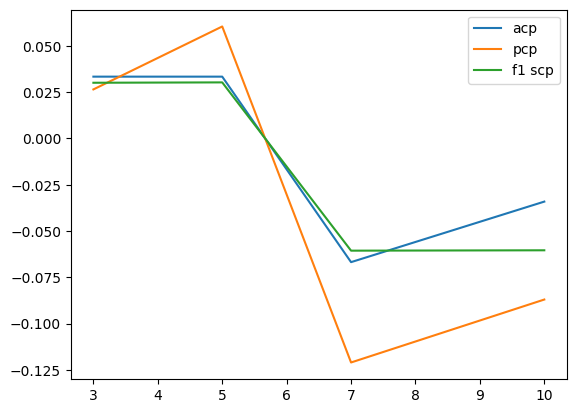

In [ ]:
xcols = [3, 5, 7, 10]
ycols1 = [0.0334, 0.0334, -0.0668, -0.0341]
ycols2 = [0.0265, 0.0605, -0.1210, -0.0870]
ycols3 = [0.0301,0.0303, -0.0606,  -0.0604]
#plt.yticks(np.arange(-0.8, 0.0339, 0.005))
plt.plot(xcols, ycols1, label = "acp")
plt.plot(xcols, ycols2, label = "pcp")
plt.plot(xcols, ycols3, label = "f1 scp")
plt.legend()
plt.show()

In [ ]:
modelver2.fit(x_train3, y_train2)

In [ ]:
predictions = model.predict(x_test2)
print("Accuracy: ", metrics.accuracy_score(predictions, y_test2) * 100)
print("Precision: ", metrics.average_precision_score(predictions, y_test2) * 100)
print("F1 score: ", metrics.f1_score(predictions, y_test2) * 100)

In [ ]:
predictions = modelver2.predict(x_test3)
print("Accuracy: ", metrics.accuracy_score(predictions, y_test2) * 100)
print("Precision: ", metrics.average_precision_score(predictions, y_test2) * 100)
print("F1 score: ", metrics.f1_score(predictions, y_test2) * 100)

Accuracy:  0.9933488526770868

Precision:  0.9918930412049707

F1 score:  0.9939320388349514

Accuracy:  0.9913535084802129
Precision:  0.990384286241445
F1 score:  0.9921639541892706




## This is expirments 3

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
estimators2 = [
    ('lg', make_pipeline(StandardScaler(), LogisticRegression(max_iter = 200))),
    #('mlp', make_pipeline(StandardScaler(), MLPClassifier(max_iter = 300))),
    ('RF', make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100))),
    ('adc', make_pipeline(StandardScaler(), AdaBoostClassifier(n_estimators=100)))
]
modelVoting = VotingClassifier(estimators=estimators2, voting='hard')

In [ ]:
modelVoting.fit(x_train2, y_train2)
predictions = modelVoting.predict(x_test2)
print("Accuracy: ", metrics.accuracy_score(predictions, y_test2) * 100)
print("Precision: ", metrics.average_precision_score(predictions, y_test2) * 100)
print("F1 score: ", metrics.f1_score(predictions, y_test2) * 100)
base_acc = metrics.accuracy_score(predictions, y_test2) * 100
base_prec = metrics.average_precision_score(predictions, y_test2) * 100
base_f1 = metrics.f1_score(predictions, y_test2) * 100

Accuracy:  99.46790821416694
Precision:  99.29441316038022
F1 score:  99.5296884185773


In [ ]:
x_train3 = x_train2.drop('ObjStm', axis=1)
x_train3.drop('stream', axis=1, inplace=True)
x_train3.drop('Colors', axis=1, inplace=True)

x_test3 = x_test2.drop('ObjStm', axis=1)
x_test3.drop('stream', axis=1, inplace=True)
x_test3.drop('Colors', axis=1, inplace=True)

modelVoting.fit(x_train3, y_train2)
predictions = modelVoting.predict(x_test3)
print("Accuracy: ", metrics.accuracy_score(predictions, y_test2) * 100)
print("Precision: ", metrics.average_precision_score(predictions, y_test2) * 100)
print("F1 score: ", metrics.f1_score(predictions, y_test2) * 100)
accDev = ((metrics.accuracy_score(predictions, y_test2) * 100) / base_acc * 100) - 100
presDev = ((metrics.average_precision_score(predictions, y_test2) * 100) / base_prec * 100) - 100
f1Dev = ((metrics.f1_score(predictions, y_test2) * 100) / base_f1 * 100) - 100
print('Accuracy deviation: ', accDev)
print('Precision deviation: ', presDev)
print('F1 score deviation: ', f1Dev)

Accuracy:  99.00232790156302
Precision:  98.50564135072752
F1 score:  99.1150442477876
Accuracy deviation:  -0.4680708793045767
Precision deviation:  -0.7943768280081116
F1 score deviation:  -0.4166035053238488


In [ ]:
x_train3 = x_train2.drop('ObjStm', axis=1)
x_train3.drop('stream', axis=1, inplace=True)
x_train3.drop('Colors', axis=1, inplace=True)
x_train3.drop('AA', axis=1, inplace=True)
x_train3.drop('OpenAction', axis=1, inplace=True)

x_test3 = x_test2.drop('ObjStm', axis=1)
x_test3.drop('stream', axis=1, inplace=True)
x_test3.drop('Colors', axis=1, inplace=True)
x_test3.drop('AA', axis=1, inplace=True)
x_test3.drop('OpenAction', axis=1, inplace=True)

modelVoting.fit(x_train3, y_train2)
predictions = modelVoting.predict(x_test3)
print("Accuracy: ", metrics.accuracy_score(predictions, y_test2) * 100)
print("Precision: ", metrics.average_precision_score(predictions, y_test2) * 100)
print("F1 score: ", metrics.f1_score(predictions, y_test2) * 100)
accDev = ((metrics.accuracy_score(predictions, y_test2) * 100) / base_acc * 100) - 100
presDev = ((metrics.average_precision_score(predictions, y_test2) * 100) / base_prec * 100) - 100
f1Dev = ((metrics.f1_score(predictions, y_test2) * 100) / base_f1 * 100) - 100
print('Accuracy deviation: ', accDev)
print('Precision deviation: ', presDev)
print('F1 score deviation: ', f1Dev)

Accuracy:  98.7362820086465
Precision:  98.06946361284513
F1 score:  98.87706855791963
Accuracy deviation:  -0.7355399531928981
Precision deviation:  -1.2336540481452403
F1 score deviation:  -0.6557037111510198


In [ ]:
x_train3 = x_train2.drop('ObjStm', axis=1)
x_train3.drop('stream', axis=1, inplace=True)
x_train3.drop('Colors', axis=1, inplace=True)
x_train3.drop('AA', axis=1, inplace=True)
x_train3.drop('OpenAction', axis=1, inplace=True)
x_train3.drop('pages', axis=1, inplace=True)
x_train3.drop('isEncrypted', axis=1, inplace=True)

x_test3 = x_test2.drop('ObjStm', axis=1)
x_test3.drop('stream', axis=1, inplace=True)
x_test3.drop('Colors', axis=1, inplace=True)
x_test3.drop('AA', axis=1, inplace=True)
x_test3.drop('OpenAction', axis=1, inplace=True)
x_test3.drop('pages', axis=1, inplace=True)
x_test3.drop('isEncrypted', axis=1, inplace=True)

modelVoting.fit(x_train3, y_train2)
predictions = modelVoting.predict(x_test3)
print("Accuracy: ", metrics.accuracy_score(predictions, y_test2) * 100)
print("Precision: ", metrics.average_precision_score(predictions, y_test2) * 100)
print("F1 score: ", metrics.f1_score(predictions, y_test2) * 100)
accDev = ((metrics.accuracy_score(predictions, y_test2) * 100) / base_acc * 100) - 100
presDev = ((metrics.average_precision_score(predictions, y_test2) * 100) / base_prec * 100) - 100
f1Dev = ((metrics.f1_score(predictions, y_test2) * 100) / base_f1 * 100) - 100
print('Accuracy deviation: ', accDev)
print('Precision deviation: ', presDev)
print('F1 score deviation: ', f1Dev)

Accuracy:  98.76953774526106
Precision:  98.16213123106981
F1 score:  98.90758783584293
Accuracy deviation:  -0.702106318956865
Precision deviation:  -1.1403279331351257
F1 score deviation:  -0.6250402192741547


In [ ]:
x_train3 = x_train2.drop('ObjStm', axis=1)
x_train3.drop('stream', axis=1, inplace=True)
x_train3.drop('Colors', axis=1, inplace=True)
x_train3.drop('AA', axis=1, inplace=True)
x_train3.drop('OpenAction', axis=1, inplace=True)
x_train3.drop('pages', axis=1, inplace=True)
x_train3.drop('isEncrypted', axis=1, inplace=True)
x_train3.drop('XFA', axis=1, inplace=True)
x_train3.drop('pdfsize', axis=1, inplace=True)
x_train3.drop('title characters', axis=1, inplace=True)

x_test3 = x_test2.drop('ObjStm', axis=1)
x_test3.drop('stream', axis=1, inplace=True)
x_test3.drop('Colors', axis=1, inplace=True)
x_test3.drop('AA', axis=1, inplace=True)
x_test3.drop('OpenAction', axis=1, inplace=True)
x_test3.drop('pages', axis=1, inplace=True)
x_test3.drop('isEncrypted', axis=1, inplace=True)
x_test3.drop('XFA', axis=1, inplace=True)
x_test3.drop('pdfsize', axis=1, inplace=True)
x_test3.drop('title characters', axis=1, inplace=True)

modelVoting.fit(x_train3, y_train2)
predictions = modelVoting.predict(x_test3)
print("Accuracy: ", metrics.accuracy_score(predictions, y_test2) * 100)
print("Precision: ", metrics.average_precision_score(predictions, y_test2) * 100)
print("F1 score: ", metrics.f1_score(predictions, y_test2) * 100)
accDev = ((metrics.accuracy_score(predictions, y_test2) * 100) / base_acc * 100) - 100
presDev = ((metrics.average_precision_score(predictions, y_test2) * 100) / base_prec * 100) - 100
f1Dev = ((metrics.f1_score(predictions, y_test2) * 100) / base_f1 * 100) - 100
print('Accuracy deviation: ', accDev)
print('Precision deviation: ', presDev)
print('F1 score deviation: ', f1Dev)

Accuracy:  98.53674758895909
Precision:  97.85302706097977
F1 score:  98.70053160070881
Accuracy deviation:  -0.9361417586091676
Precision deviation:  -1.451628599760511
F1 score deviation:  -0.833074865442569


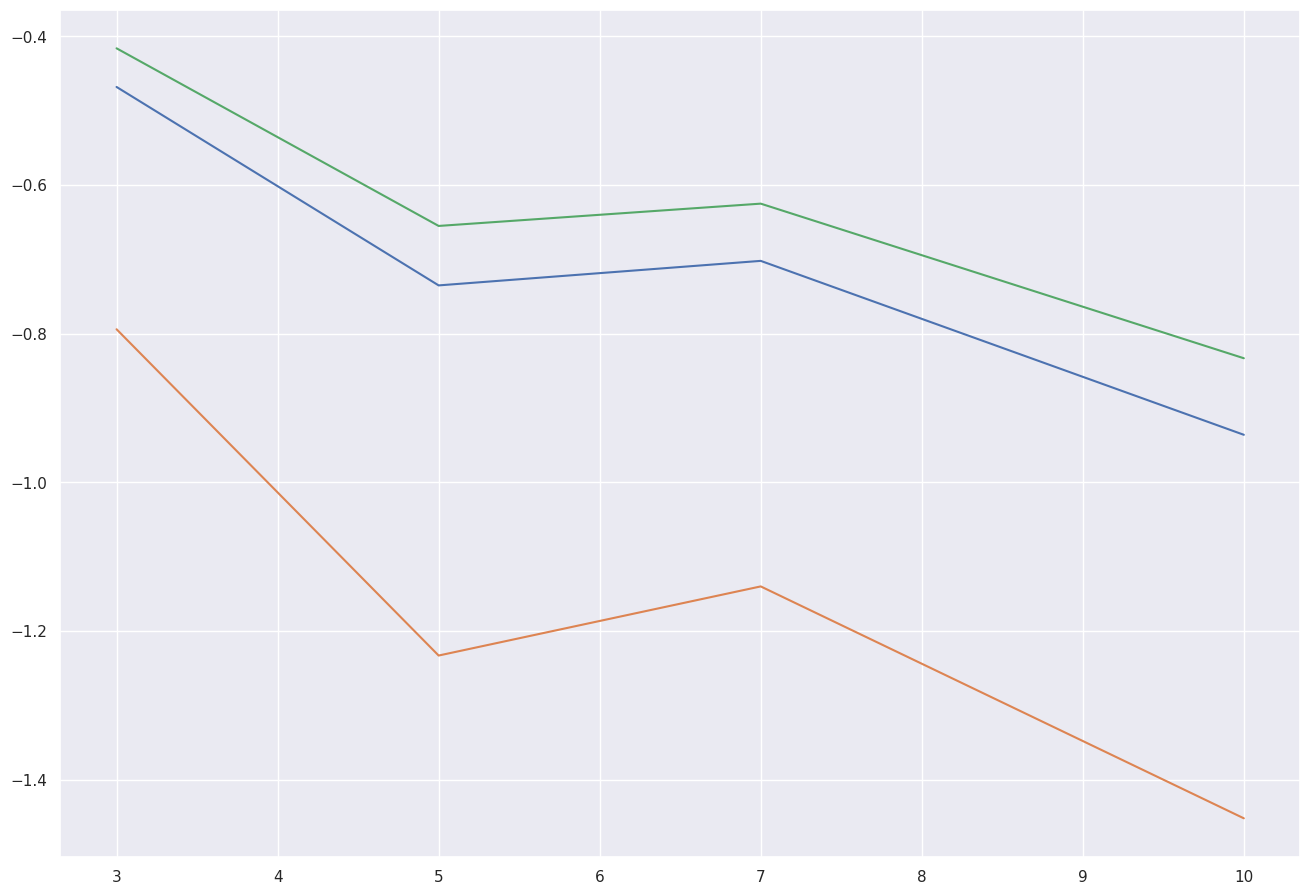

In [ ]:
xcols = [3, 5, 7, 10]
ycols1 = [-0.468,-0.735, -0.702, -0.936]
ycols2 = [-0.794, -1.233, -1.14, -1.452]
ycols3 = [-0.416, -0.655, -0.625, -0.833]
#plt.yticks(np.arange(-0.8, 0.0339, 0.005))
plt.plot(xcols, ycols1, label = "acp")
plt.plot(xcols, ycols2, label = "pcp")
plt.plot(xcols, ycols3, label = "f1 scp")
plt.legend()
plt.show()

## This is expirments 4

In [ ]:
!pip install --upgrade pymupdf

In [ ]:
import fitz

In [ ]:
doc = fitz.open('Issakhani2022PDF.pdf')
print(doc.page_count)
print(doc.metadata['format'])
print(doc.metadata['encryption'])
print(len(doc.metadata['title']))
count = 0
for page in doc:
  for img in page.get_images():
    count += 1
print(count)

## This is expirment 5

In [ ]:
modeln = keras.models.Sequential([
    layers.Dense(16, activation='relu', input_dim=24),
    layers.Dense(64, activation='relu'),
    #layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
modeln.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
es = EarlyStopping(monitor='val_accuracy',
                                   mode='max', # don't minimize the accuracy!
                                   patience=10,
                                   restore_best_weights=True)
hist = modeln.fit(x_train2, y_train2, epochs=20, batch_size=50, validation_split=0.3, callbacks=[es])
modelnresults = modeln.evaluate(x_test2, y_test2)
base_acc = modelnresults[1] * 100
base_prec = modelnresults[2] * 100
base_f1 = 2 * (modelnresults[1] * modelnresults[2]) / (modelnresults[1] + modelnresults[2]) * 100

print("Accuracy: ", base_acc)
print("Precision: ", base_prec)
print("F1 score: ", base_f1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
x_train3 = x_train2.drop('images', axis=1)
x_train3.drop('pages', axis=1, inplace=True)
x_train3.drop('embedded files', axis=1, inplace=True)

x_test3 = x_test2.drop('images', axis=1)
x_test3.drop('pages', axis=1, inplace=True)
x_test3.drop('embedded files', axis=1, inplace=True)

modeln = keras.models.Sequential([
    layers.Dense(16, activation='relu', input_dim=21),
    layers.Dense(64, activation='relu'),
    #layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
modeln.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
es = EarlyStopping(monitor='val_accuracy',
                                   mode='max', # don't minimize the accuracy!
                                   patience=10,
                                   restore_best_weights=True)
hist = modeln.fit(x_train3, y_train2, epochs=20, batch_size=50, validation_split=0.3, callbacks=[es])
modelnresults = modeln.evaluate(x_test3, y_test2)
acc = modelnresults[1] * 100
prec = modelnresults[2] * 100
f1 = 2 * (modelnresults[1] * modelnresults[2]) / (modelnresults[1] + modelnresults[2]) * 100

print("Accuracy: ", acc)
print("Precision: ", prec)
print("F1 score: ", f1)
accDev = (acc / base_acc * 100) - 100
presDev = (prec / base_prec * 100) - 100
f1Dev = (f1 / base_f1 * 100) - 100
print('Accuracy deviation: ', accDev)
print('Precision deviation: ', presDev)
print('F1 score deviation: ', f1Dev)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
x_train3 = x_train2.drop('images', axis=1)
x_train3.drop('pages', axis=1, inplace=True)
x_train3.drop('embedded files', axis=1, inplace=True)
x_train3.drop('XFA', axis=1, inplace=True)
x_train3.drop('RichMedia', axis=1, inplace=True)

x_test3 = x_test2.drop('images', axis=1)
x_test3.drop('pages', axis=1, inplace=True)
x_test3.drop('embedded files', axis=1, inplace=True)
x_test3.drop('XFA', axis=1, inplace=True)
x_test3.drop('RichMedia', axis=1, inplace=True)

modeln = keras.models.Sequential([
    layers.Dense(16, activation='relu', input_dim=19),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
modeln.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
es = EarlyStopping(monitor='val_accuracy',
                                   mode='max', # don't minimize the accuracy!
                                   patience=10,
                                   restore_best_weights=True)
hist = modeln.fit(x_train3, y_train2, epochs=20, batch_size=50, validation_split=0.3, callbacks=[es])
modelnresults = modeln.evaluate(x_test3, y_test2)
acc = modelnresults[1] * 100
prec = modelnresults[2] * 100
f1 = 2 * (modelnresults[1] * modelnresults[2]) / (modelnresults[1] + modelnresults[2]) * 100

print("Accuracy: ", acc)
print("Precision: ", prec)
print("F1 score: ", f1)
accDev = (acc / base_acc * 100) - 100
presDev = (prec / base_prec * 100) - 100
f1Dev = (f1 / base_f1 * 100) - 100
print('Accuracy deviation: ', accDev)
print('Precision deviation: ', presDev)
print('F1 score deviation: ', f1Dev)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
x_train3 = x_train2.drop('images', axis=1)
x_train3.drop('pages', axis=1, inplace=True)
x_train3.drop('embedded files', axis=1, inplace=True)
x_train3.drop('XFA', axis=1, inplace=True)
x_train3.drop('RichMedia', axis=1, inplace=True)
x_train3.drop('AA', axis=1, inplace=True)
x_train3.drop('pdfsize', axis=1, inplace=True)

x_test3 = x_test2.drop('images', axis=1)
x_test3.drop('pages', axis=1, inplace=True)
x_test3.drop('embedded files', axis=1, inplace=True)
x_test3.drop('XFA', axis=1, inplace=True)
x_test3.drop('RichMedia', axis=1, inplace=True)
x_test3.drop('AA', axis=1, inplace=True)
x_test3.drop('pdfsize', axis=1, inplace=True)

modeln = keras.models.Sequential([
    layers.Dense(16, activation='relu', input_dim=17),
    layers.Dense(16, activation='relu'),
    #layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
modeln.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
es = EarlyStopping(monitor='val_accuracy',
                                   mode='max', # don't minimize the accuracy!
                                   patience=10,
                                   restore_best_weights=True)
hist = modeln.fit(x_train3, y_train2, epochs=20, batch_size=50, validation_split=0.3, callbacks=[es])
modelnresults = modeln.evaluate(x_test3, y_test2)
acc = modelnresults[1] * 100
prec = modelnresults[2] * 100
f1 = 2 * (modelnresults[1] * modelnresults[2]) / (modelnresults[1] + modelnresults[2]) * 100

print("Accuracy: ", acc)
print("Precision: ", prec)
print("F1 score: ", f1)
accDev = (acc / base_acc * 100) - 100
presDev = (prec / base_prec * 100) - 100
f1Dev = (f1 / base_f1 * 100) - 100
print('Accuracy deviation: ', accDev)
print('Precision deviation: ', presDev)
print('F1 score deviation: ', f1Dev)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
x_train3 = x_train2.drop('images', axis=1)
x_train3.drop('pages', axis=1, inplace=True)
x_train3.drop('embedded files', axis=1, inplace=True)
x_train3.drop('XFA', axis=1, inplace=True)
x_train3.drop('RichMedia', axis=1, inplace=True)
x_train3.drop('AA', axis=1, inplace=True)
x_train3.drop('pdfsize', axis=1, inplace=True)
x_train3.drop('title characters', axis=1, inplace=True)
x_train3.drop('isEncrypted', axis=1, inplace=True)
x_train3.drop('ObjStm', axis=1, inplace=True)

x_test3 = x_test2.drop('images', axis=1)
x_test3.drop('pages', axis=1, inplace=True)
x_test3.drop('embedded files', axis=1, inplace=True)
x_test3.drop('XFA', axis=1, inplace=True)
x_test3.drop('RichMedia', axis=1, inplace=True)
x_test3.drop('AA', axis=1, inplace=True)
x_test3.drop('pdfsize', axis=1, inplace=True)
x_test3.drop('title characters', axis=1, inplace=True)
x_test3.drop('isEncrypted', axis=1, inplace=True)
x_test3.drop('ObjStm', axis=1, inplace=True)

modeln = keras.models.Sequential([
    layers.Dense(16, activation='relu', input_dim=14),
    layers.Dense(64, activation='relu'),
    #layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
modeln.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
es = EarlyStopping(monitor='val_accuracy',
                                   mode='max', # don't minimize the accuracy!
                                   patience=10,
                                   restore_best_weights=True)
hist = modeln.fit(x_train3, y_train2, epochs=20, batch_size=50, validation_split=0.3, callbacks=[es])
modelnresults = modeln.evaluate(x_test3, y_test2)
acc = modelnresults[1] * 100
prec = modelnresults[2] * 100
f1 = 2 * (modelnresults[1] * modelnresults[2]) / (modelnresults[1] + modelnresults[2]) * 100

print("Accuracy: ", acc)
print("Precision: ", prec)
print("F1 score: ", f1)
accDev = (acc / base_acc * 100) - 100
presDev = (prec / base_prec * 100) - 100
f1Dev = (f1 / base_f1 * 100) - 100
print('Accuracy deviation: ', accDev)
print('Precision deviation: ', presDev)
print('F1 score deviation: ', f1Dev)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
modeln.summary()

In [ ]:
xcols = [3, 5, 7, 10]
ycols1 = [-6.9701, 1.2447, -1.7070, -3.3784]
ycols2 = [-4.6788, 1.8153, -1.6616, -6.0883]
ycols3 = [-5.8438, 1.5278, -1.6844, -4.7463]
#plt.yticks(np.arange(-0.8, 0.0339, 0.005))
plt.plot(xcols, ycols1, label = "acp")
plt.plot(xcols, ycols2, label = "pcp")
plt.plot(xcols, ycols3, label = "f1 scp")
plt.legend()
plt.show()